In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### Dataset:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by:
P. Savicky
Institute of Computer Science, AS of CR
Czech Republic
savicky '@' cs.cas.cz

In [3]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('magic04.data', names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [4]:
df['class'].unique() #gamas and hadrons

array(['g', 'h'], dtype=object)

In [5]:
df['class'] = (df['class']=='g').astype(int) #burada g ise 1 degerini h ise 0 degerini aliyo

In [6]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

In [7]:
df[df['class']==1]['fDist']

0         81.8828
1        205.2610
2        256.7880
3        116.7370
4        356.4620
           ...   
12327    204.0370
12328    205.4980
12329    123.2810
12330    197.2090
12331    171.2270
Name: fDist, Length: 12332, dtype: float64

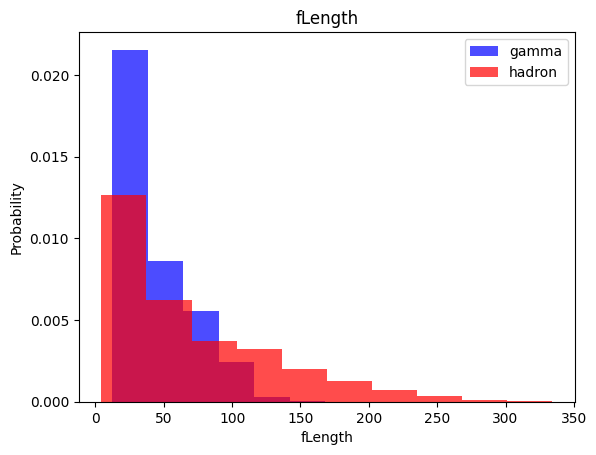

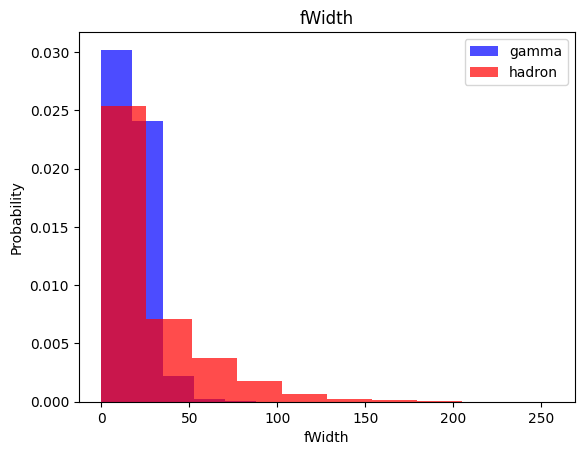

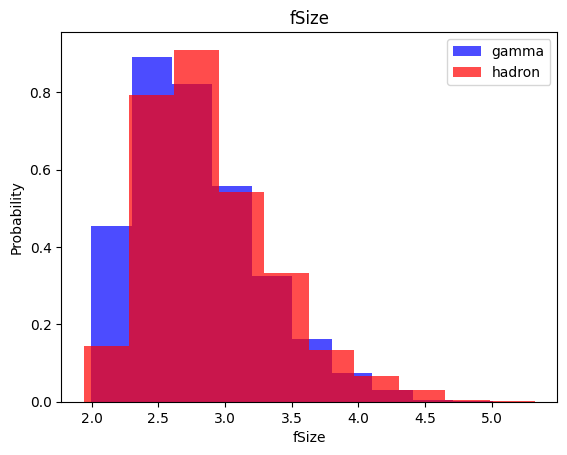

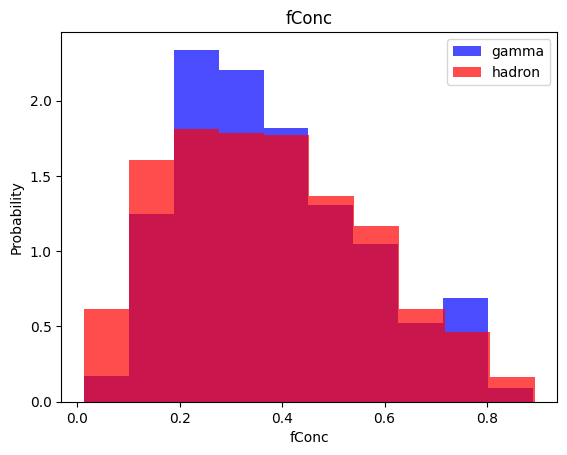

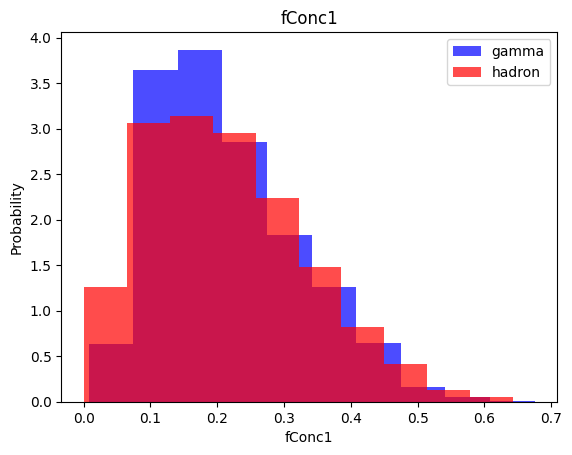

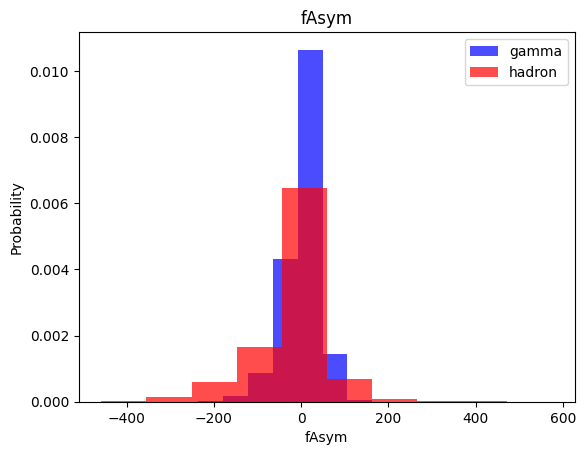

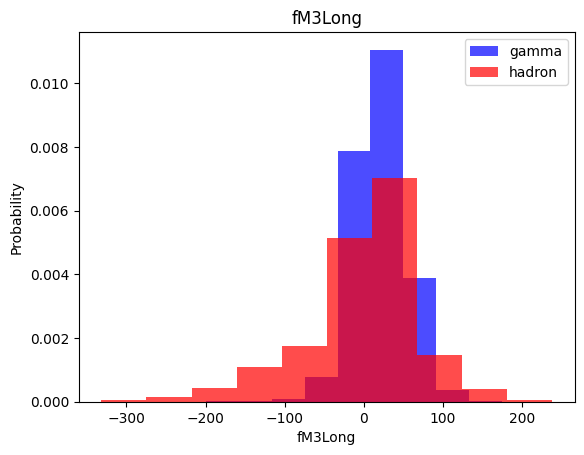

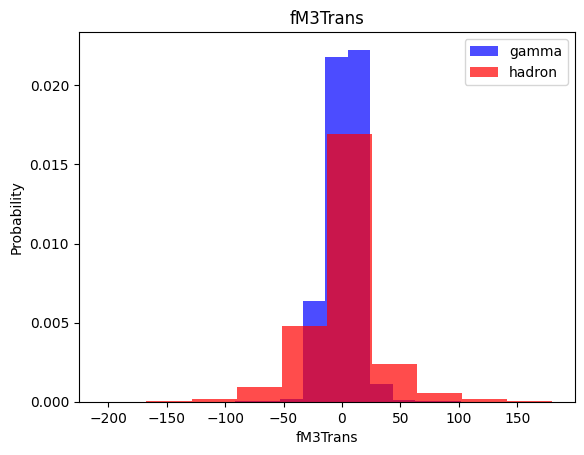

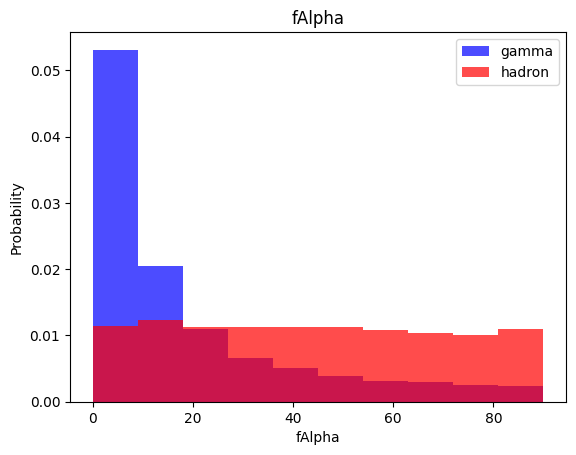

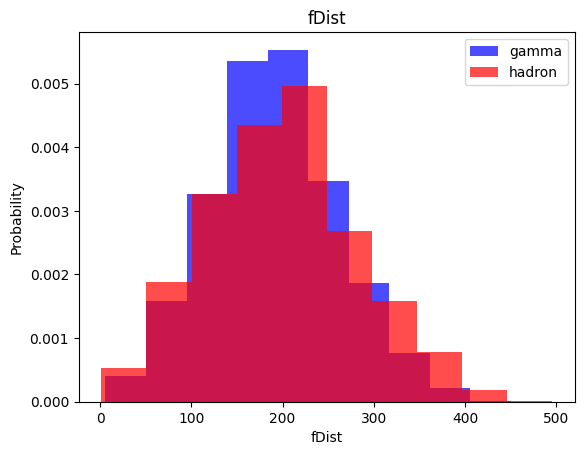

In [8]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True) #her label icin gamma olanlara bakiyoruz. alpha is for transparency. denisty true ise distributionu normalize ediyor. Eger 200 sample bi datadan 50 sample bi datadan olursa 200 baskin gelir aslinda bunlari denklestiriyor gibi
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()
  #burada mesela fAsym genis ise more likely hadron diyebiliyoruz.

#Train, validation, test datasets

In [9]:
#df.sample(frac=1): creates a shuffled copy of the df. frac=1 include %100 of the df
#np.split(...): multiple sub arraylere bolmek icin kullaniyo asagida 3 arraye boluyor
#[int(0.6*len(df)), int(0.8*len(df))] kismi ise df in ilk %60 ini traine ver, 60 dan 80 e kadar valid'e ver, 80 den 100 e olan kismini ise teste ver diyoruz.
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])



/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [10]:
print(len(train[train['class']==1])) #gama
print(len(train[train['class']==0]))
#bu output sorun olabilir cunku sayica fark var bu yuzden hadronlarin sayisini arttirabiliriz asagidaki scale foksiyonunda. Buna oversampling diyoruz

7380
4032


In [11]:
#datamizda bazi kolonlarin degerleri 0.3 gibi degerler bazilari ise 162.02 gibi degerler bunlari scale etmemiz lazim.
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values #direkt labellar olmadan degerleri aliyoruz
  y = dataframe[dataframe.columns[-1]].values

  #Scale etme sebebimiz ML algortmalari similar scale feature larda daha iyi sonuc verebiliyor
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)#balance the classes by increasing the number of instances in the minority class.
    #RandomOverSampler is a specific oversampling method that achieves this by randomly duplicating samples from the minority class.



  #burada arrayleri yatay olarak birlestiriyoruz ornegiin:
  """
  X = np.array([[1500, 3],
                [2000, 4],
                [1200, 2]])

  y = np.array([250, 320, 180])

  data = np.hstack((X, y))

  array([[1500,    3,  250],
       [2000,    4,  320],
       [1200,    2,  180]])

  """
  #ancak x ve y farkli sahpelerde oldugu icin reshape ediyoruz. Bu ornekte zorunda degiliz galiba
  data = np.hstack((X, np.reshape(y, (len(y), 1)))) #burada len(y) yerine -1 yazarsan o da len(y) anlaminda geliyor.

  return data, X, y



In [12]:
train, X_train, y_train = scale_dataset(train, oversample=True) #train datasette fark vardi hatirliyosan o farki gideriyoruz oversample diyerekten

In [13]:
len(y_train)

14760

In [14]:
print(len(y_train[y_train==1]))
print(len(y_train[y_train==0]))#esit ciktilar

7380
7380


In [15]:
#Simdi valid ve test dataset icin de yapalim. Burada False yapmamiz sebebimiz performans olcuyor bunlar egitimde kullanmiyoruz.
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)


# kNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
y_pred = knn_model.predict(X_test)

In [19]:
y_pred #predict edilen degerler

array([1, 1, 1, ..., 1, 0, 1])

In [20]:
y_test #gercek degerler

array([1, 1, 1, ..., 1, 1, 1])

In [21]:
print(classification_report(y_test, y_pred)) #genel durum ile ilgili rapor aliyoruz
#false negativeler(aslinda positive ama negative isaretlenmis)
#precision: tum positive isaretlenenler arasinda ne kadarik gercek positive. yani true_positive / (true_postivie + false_positive). Tabi bi de negativeler icin ayni sey var
#recall: postive olanlarin yuzde kaci positive olarak isaretlendi
#f1_score: kind of combination of precision and recall score

              precision    recall  f1-score   support

           0       0.76      0.65      0.70      1314
           1       0.83      0.89      0.86      2490

    accuracy                           0.81      3804
   macro avg       0.79      0.77      0.78      3804
weighted avg       0.80      0.81      0.80      3804



In [22]:
# k=5 olsaydi nasil olurdu?
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1314
           1       0.86      0.86      0.86      2490

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [25]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))
#Skorlar knn e gore daha kotu geldi genel olarak demek ki pek de uygun degilmis

              precision    recall  f1-score   support

           0       0.67      0.39      0.50      1314
           1       0.74      0.90      0.81      2490

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.65      3804
weighted avg       0.72      0.73      0.70      3804



# Log Regression

In [26]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [27]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))
# bu yine bi tik daha iyi oldu sebebi notlarda var

              precision    recall  f1-score   support

           0       0.66      0.72      0.69      1314
           1       0.84      0.80      0.82      2490

    accuracy                           0.77      3804
   macro avg       0.75      0.76      0.76      3804
weighted avg       0.78      0.77      0.78      3804



# SVM

In [28]:
from sklearn.svm import SVC #Support vector classifier

svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [29]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
#wayyyyy cok ii  ama bakalim neural networkler ile daha iisini yapabilecek miyiz

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1314
           1       0.88      0.90      0.89      2490

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Net

In [30]:
import tensorflow as tf

In [31]:
def plot_history(history): #bunu bi yerden caldik sen de calabilirsin herseyi de bilme
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [32]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([ #sequential NN olustuyoruz en bilindik olan sirali
      tf.keras.layers.Dense(num_nodes, activation="relu", input_shape=(10, )), #dense=her node bi sonraki layerdeki tum node lara bagli, 32 tane node var ilk katmanimizda ve activation function da relu
      tf.keras.layers.Dropout(dropout_prob), #randomly choose certain nodes and dont train them (prevents overfitting)
      tf.keras.layers.Dense(32, activation="relu"),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation="sigmoid") #output layer, sigmoid secmemizin sebebi outputlarimiz 0 yada 1 olmasi sanirim
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy']) #burada adam dedigimiz sey learning rate dedigimiz kucuk alfa (step size i yani)

  history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size ,validation_split=0.2) #epoch train setini kac kere gorecegi, batch_size=her adimda kullanilacak veri noktasi sayisi. validation_split = 0.2 ise, veri setinin %80’i eğitim için, %20’si doğrulama için kullanılır.

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.7992 - loss: 0.4432 - val_accuracy: 0.7730 - val_loss: 0.4210
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8509 - loss: 0.3489 - val_accuracy: 0.7097 - val_loss: 0.5178
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8594 - loss: 0.3347 - val_accuracy: 0.7127 - val_loss: 0.5520
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8605 - loss: 0.3248 - val_accuracy: 0.6972 - val_loss: 0.5692
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8629 - loss: 0.3185 - val_accuracy: 0.7727 - val_loss: 0.4344
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8622 - loss: 0.3275 - val_accuracy: 0.7751 - val_loss: 0.4126
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8606 - loss: 0.3310 - val_accuracy: 0.7551 - val_loss: 0.4787
Epoch 8/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

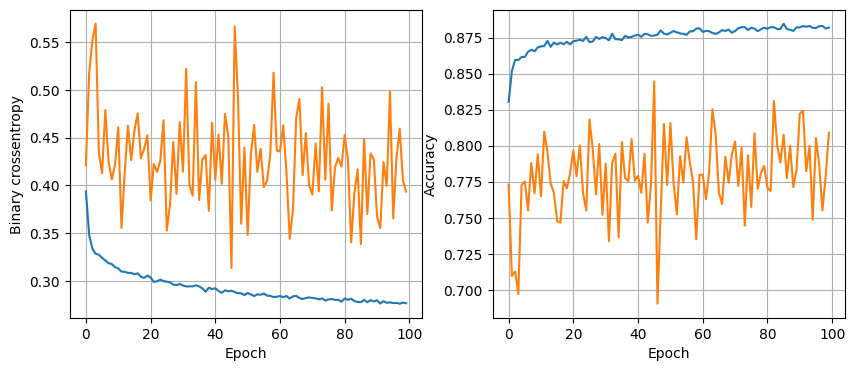

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8790 - loss: 0.3117
16 nodes, dropout 0, lr 0.01, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7855 - loss: 0.4557 - val_accuracy: 0.7026 - val_loss: 0.5931
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8531 - loss: 0.3498 - val_accuracy: 0.6944 - val_loss: 0.5891
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8564 - loss: 0.3357 - val_accuracy: 0.6809 - val_loss: 0.5919
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8574 - loss: 0.3305 - val_accuracy: 0.7588 - val_loss: 0.4676
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8651 - loss: 0.3266 - val_accuracy: 0.8018 - val_loss: 0.3671
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8691 - loss: 0.3161 - val_accuracy: 0.7652 - val_loss: 0.4508
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8582 - loss: 0.3173 - val_accuracy: 0.80

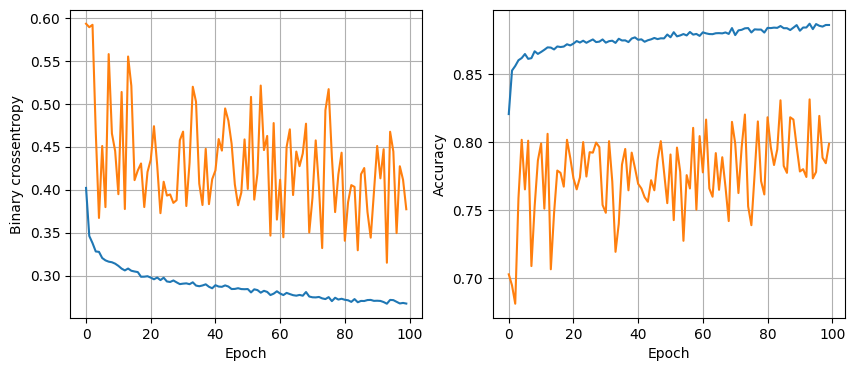

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8788 - loss: 0.3122
16 nodes, dropout 0, lr 0.01, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7611 - loss: 0.4801 - val_accuracy: 0.7222 - val_loss: 0.5956
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8466 - loss: 0.3611 - val_accuracy: 0.7016 - val_loss: 0.5344
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8634 - loss: 0.3246 - val_accuracy: 0.7514 - val_loss: 0.4585
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8630 - loss: 0.3294 - val_accuracy: 0.7503 - val_loss: 0.4688
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8620 - loss: 0.3201 - val_accuracy: 0.7392 - val_loss: 0.4630
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8651 - loss: 0.3228 - val_accuracy: 0.7530 - val_loss: 0.4649
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8636 - loss: 0.3213 - val_accuracy: 0.7310 - val_loss

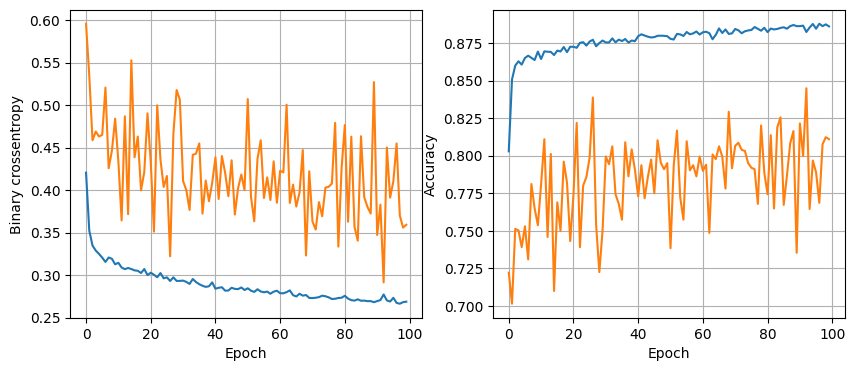

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8882 - loss: 0.2972
16 nodes, dropout 0, lr 0.005, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7797 - loss: 0.4764 - val_accuracy: 0.7073 - val_loss: 0.5564
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8431 - loss: 0.3622 - val_accuracy: 0.7781 - val_loss: 0.4442
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8541 - loss: 0.3441 - val_accuracy: 0.7578 - val_loss: 0.4573
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8571 - loss: 0.3353 - val_accuracy: 0.7788 - val_loss: 0.4672
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8571 - loss: 0.3366 - val_accuracy: 0.7314 - val_loss: 0.5366
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8649 - loss: 0.3157 - val_accuracy: 0.7964 - val_loss: 0.4026
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8616 - loss: 0.3206 - val_accuracy: 0.7

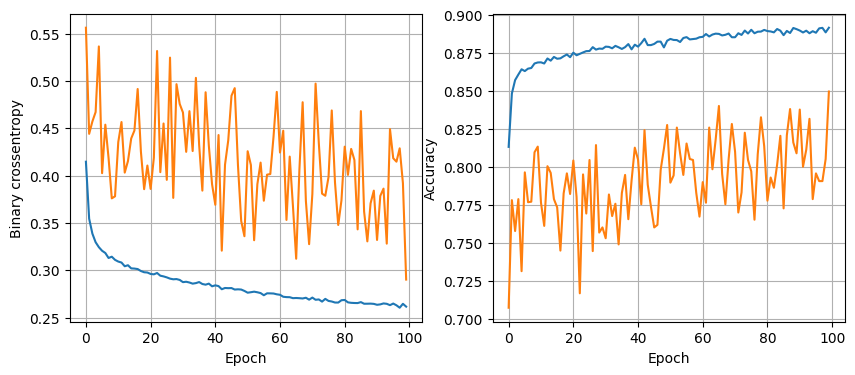

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8693 - loss: 0.3271
16 nodes, dropout 0, lr 0.005, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7363 - loss: 0.5055 - val_accuracy: 0.6728 - val_loss: 0.6032
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8416 - loss: 0.3696 - val_accuracy: 0.7259 - val_loss: 0.5329
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8430 - loss: 0.3594 - val_accuracy: 0.6701 - val_loss: 0.6264
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8575 - loss: 0.3386 - val_accuracy: 0.6274 - val_loss: 0.6866
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8532 - loss: 0.3405 - val_accuracy: 0.8032 - val_loss: 0.4055
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8709 - loss: 0.3122 - val_accuracy: 0.7632 - val_loss: 0.4392
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8600 - loss: 0.3296 - val_accuracy: 0.7

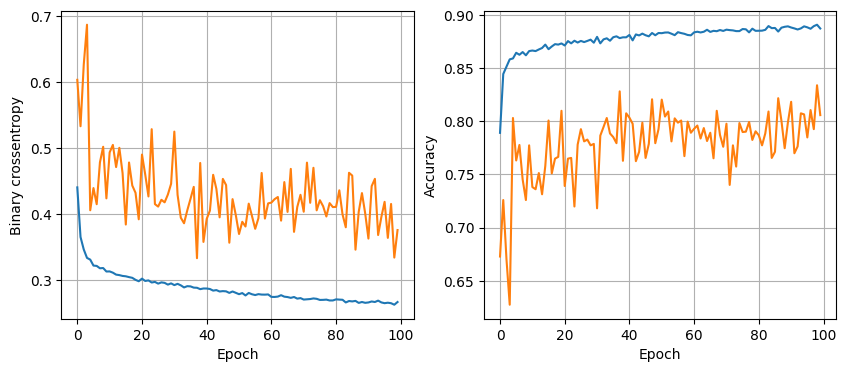

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8802 - loss: 0.2868
16 nodes, dropout 0, lr 0.005, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7561 - loss: 0.4992 - val_accuracy: 0.6463 - val_loss: 0.6524
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8456 - loss: 0.3613 - val_accuracy: 0.7971 - val_loss: 0.4233
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8538 - loss: 0.3460 - val_accuracy: 0.7392 - val_loss: 0.4944
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8581 - loss: 0.3355 - val_accuracy: 0.7470 - val_loss: 0.4854
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8651 - loss: 0.3209 - val_accuracy: 0.7307 - val_loss: 0.5288
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8625 - loss: 0.3282 - val_accuracy: 0.7287 - val_loss: 0.5331
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8694 - loss: 0.3170 - val_accuracy: 0.7520 - val_los

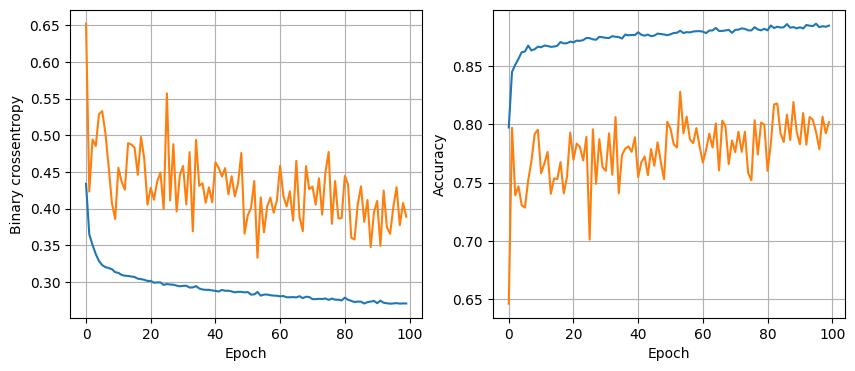

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8828 - loss: 0.2986
16 nodes, dropout 0, lr 0.001, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7278 - loss: 0.5527 - val_accuracy: 0.6524 - val_loss: 0.5948
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8281 - loss: 0.3869 - val_accuracy: 0.7503 - val_loss: 0.5038
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8408 - loss: 0.3664 - val_accuracy: 0.7337 - val_loss: 0.5209
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8474 - loss: 0.3639 - val_accuracy: 0.7581 - val_loss: 0.4807
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8517 - loss: 0.3417 - val_accuracy: 0.7642 - val_loss: 0.4666
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8560 - loss: 0.3355 - val_accuracy: 0.7564 - val_loss: 0.4853
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8575 - loss: 0.3341 - val_accuracy: 0.7

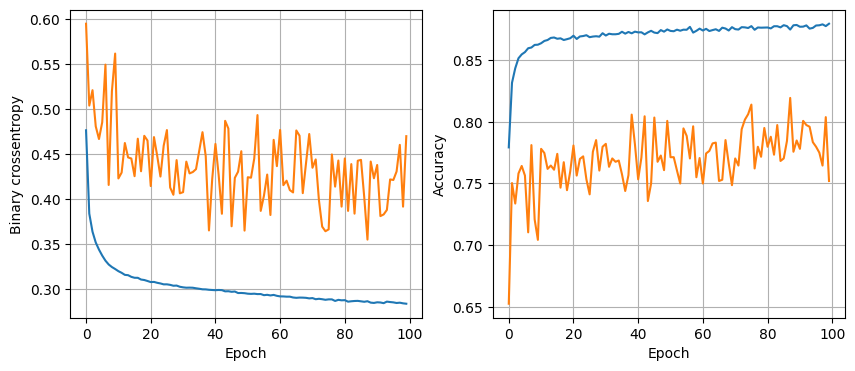

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8864 - loss: 0.2940
16 nodes, dropout 0, lr 0.001, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7205 - loss: 0.5914 - val_accuracy: 0.6264 - val_loss: 0.6011
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8065 - loss: 0.4140 - val_accuracy: 0.6477 - val_loss: 0.5995
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8249 - loss: 0.3926 - val_accuracy: 0.7161 - val_loss: 0.5237
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8380 - loss: 0.3790 - val_accuracy: 0.7226 - val_loss: 0.5429
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8499 - loss: 0.3614 - val_accuracy: 0.7432 - val_loss: 0.5144
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8564 - loss: 0.3480 - val_accuracy: 0.7483 - val_loss: 0.5030
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8548 - loss: 0.3460 - val_accuracy: 0.7

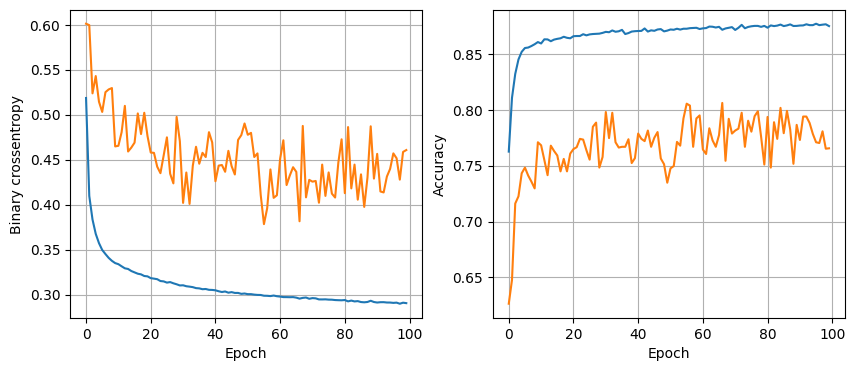

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8872 - loss: 0.2848
16 nodes, dropout 0, lr 0.001, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6389 - loss: 0.6220 - val_accuracy: 0.5098 - val_loss: 0.6265
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7983 - loss: 0.4436 - val_accuracy: 0.6314 - val_loss: 0.6253
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8152 - loss: 0.4046 - val_accuracy: 0.6491 - val_loss: 0.5964
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8178 - loss: 0.3965 - val_accuracy: 0.6646 - val_loss: 0.5868
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8331 - loss: 0.3805 - val_accuracy: 0.6819 - val_loss: 0.5871
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8352 - loss: 0.3741 - val_accuracy: 0.7327 - val_loss: 0.5089
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8477 - loss: 0.3568 - val_accuracy: 0.7256 - val_los

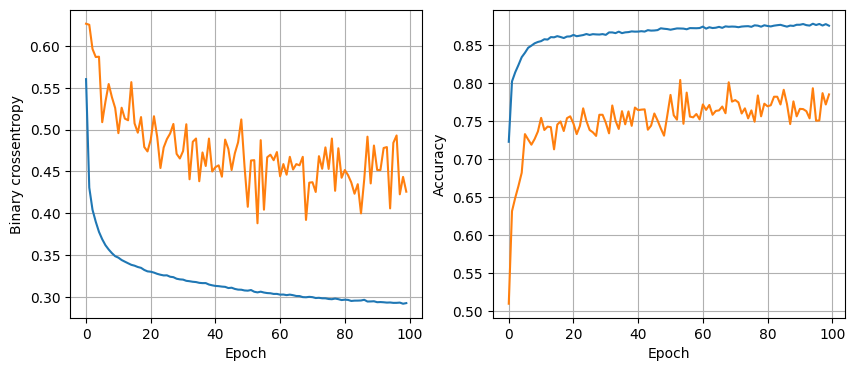

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8876 - loss: 0.2876
16 nodes, dropout 0.2, lr 0.01, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7766 - loss: 0.4805 - val_accuracy: 0.6419 - val_loss: 0.6862
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8272 - loss: 0.3935 - val_accuracy: 0.6965 - val_loss: 0.5338
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8301 - loss: 0.3773 - val_accuracy: 0.7232 - val_loss: 0.4919
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8365 - loss: 0.3684 - val_accuracy: 0.7669 - val_loss: 0.4546
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8431 - loss: 0.3690 - val_accuracy: 0.6836 - val_loss: 0.5406
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8419 - loss: 0.3728 - val_accuracy: 0.7154 - val_loss: 0.5211
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8442 - loss: 0.3564 - val_accuracy: 0.

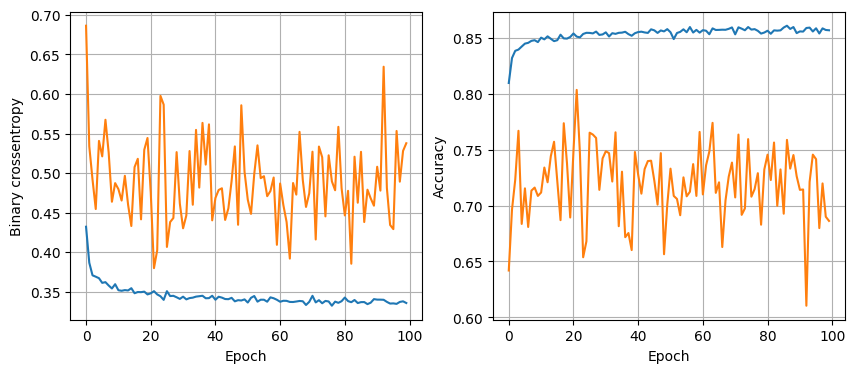

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8751 - loss: 0.2989
16 nodes, dropout 0.2, lr 0.01, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7493 - loss: 0.4989 - val_accuracy: 0.7324 - val_loss: 0.5457
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8228 - loss: 0.4102 - val_accuracy: 0.7324 - val_loss: 0.4983
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8380 - loss: 0.3828 - val_accuracy: 0.7385 - val_loss: 0.4666
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8433 - loss: 0.3644 - val_accuracy: 0.6690 - val_loss: 0.5589
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8413 - loss: 0.3694 - val_accuracy: 0.6985 - val_loss: 0.5476
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8508 - loss: 0.3554 - val_accuracy: 0.6988 - val_loss: 0.5417
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8573 - loss: 0.3492 - val_accuracy: 0.

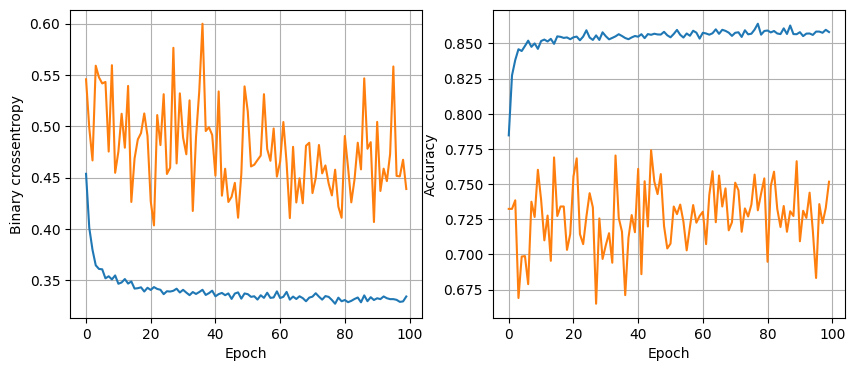

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8865 - loss: 0.2950
16 nodes, dropout 0.2, lr 0.01, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7313 - loss: 0.5265 - val_accuracy: 0.6626 - val_loss: 0.6131
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8264 - loss: 0.4042 - val_accuracy: 0.7107 - val_loss: 0.5774
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8378 - loss: 0.3821 - val_accuracy: 0.7080 - val_loss: 0.5402
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8367 - loss: 0.3833 - val_accuracy: 0.7168 - val_loss: 0.5032
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8431 - loss: 0.3713 - val_accuracy: 0.7073 - val_loss: 0.5053
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8389 - loss: 0.3727 - val_accuracy: 0.7046 - val_loss: 0.5152
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8477 - loss: 0.3572 - val_accuracy: 0.7619 - val_lo

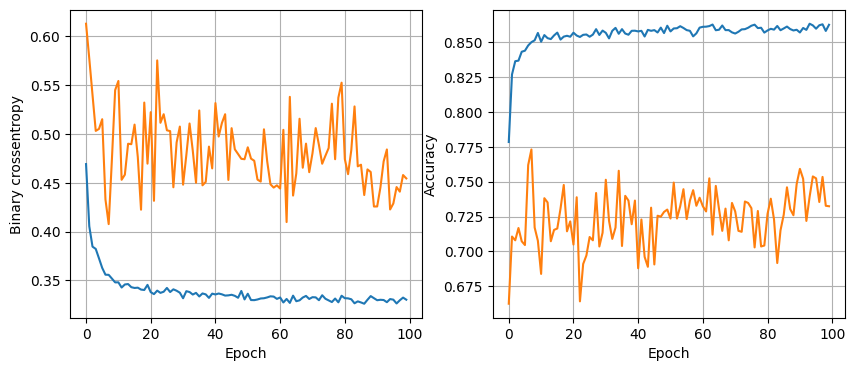

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8874 - loss: 0.2913
16 nodes, dropout 0.2, lr 0.005, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7430 - loss: 0.5301 - val_accuracy: 0.6802 - val_loss: 0.5407
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8162 - loss: 0.4082 - val_accuracy: 0.7378 - val_loss: 0.5051
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8455 - loss: 0.3731 - val_accuracy: 0.7236 - val_loss: 0.5125
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8413 - loss: 0.3643 - val_accuracy: 0.7266 - val_loss: 0.5277
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8475 - loss: 0.3560 - val_accuracy: 0.6453 - val_loss: 0.6410
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8453 - loss: 0.3577 - val_accuracy: 0.7493 - val_loss: 0.4988
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8453 - loss: 0.3570 - val_accuracy: 0

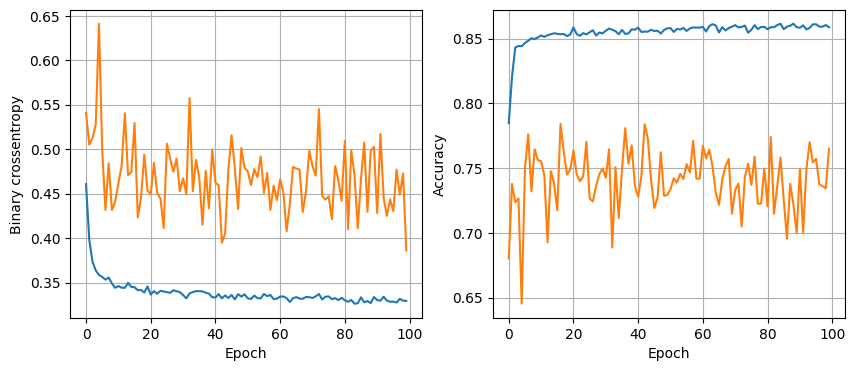

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8804 - loss: 0.3057
16 nodes, dropout 0.2, lr 0.005, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7177 - loss: 0.5305 - val_accuracy: 0.6992 - val_loss: 0.5542
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8217 - loss: 0.4133 - val_accuracy: 0.7215 - val_loss: 0.5828
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8278 - loss: 0.3824 - val_accuracy: 0.7371 - val_loss: 0.5107
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8376 - loss: 0.3717 - val_accuracy: 0.6548 - val_loss: 0.6024
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8473 - loss: 0.3660 - val_accuracy: 0.7168 - val_loss: 0.5085
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8440 - loss: 0.3705 - val_accuracy: 0.6917 - val_loss: 0.5909
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8421 - loss: 0.3629 - val_accuracy: 0

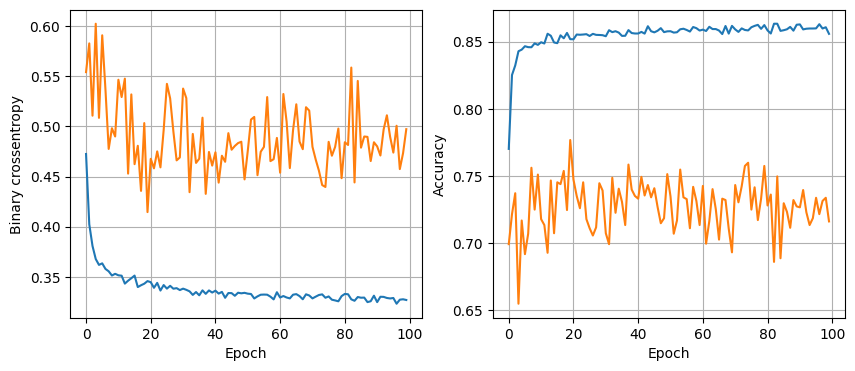

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8831 - loss: 0.2938
16 nodes, dropout 0.2, lr 0.005, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6620 - loss: 0.5913 - val_accuracy: 0.6023 - val_loss: 0.6597
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8117 - loss: 0.4144 - val_accuracy: 0.6623 - val_loss: 0.5916
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8306 - loss: 0.3914 - val_accuracy: 0.7243 - val_loss: 0.5317
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8331 - loss: 0.3864 - val_accuracy: 0.7476 - val_loss: 0.4716
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8376 - loss: 0.3817 - val_accuracy: 0.7182 - val_loss: 0.5429
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8475 - loss: 0.3603 - val_accuracy: 0.7605 - val_loss: 0.4487
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8528 - loss: 0.3554 - val_accuracy: 0.7446 - val_l

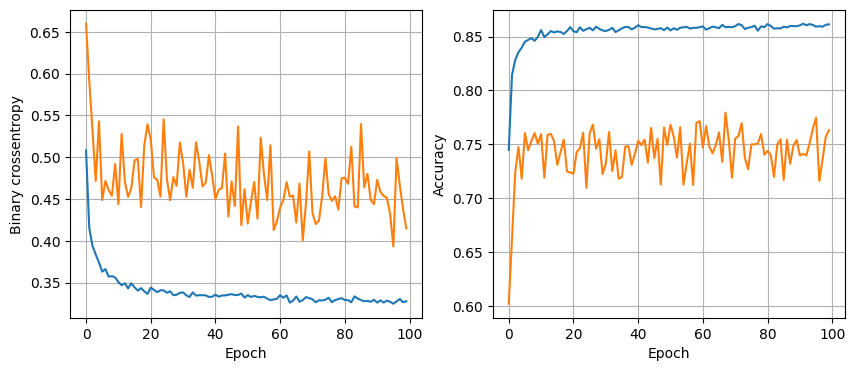

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8790 - loss: 0.2942
16 nodes, dropout 0.2, lr 0.001, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7098 - loss: 0.5709 - val_accuracy: 0.5603 - val_loss: 0.6683
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7844 - loss: 0.4542 - val_accuracy: 0.6094 - val_loss: 0.6106
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7970 - loss: 0.4292 - val_accuracy: 0.6572 - val_loss: 0.5836
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8143 - loss: 0.4102 - val_accuracy: 0.6917 - val_loss: 0.5459
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8254 - loss: 0.3971 - val_accuracy: 0.7036 - val_loss: 0.5546
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8245 - loss: 0.3958 - val_accuracy: 0.6911 - val_loss: 0.5560
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8299 - loss: 0.3872 - val_accuracy: 0

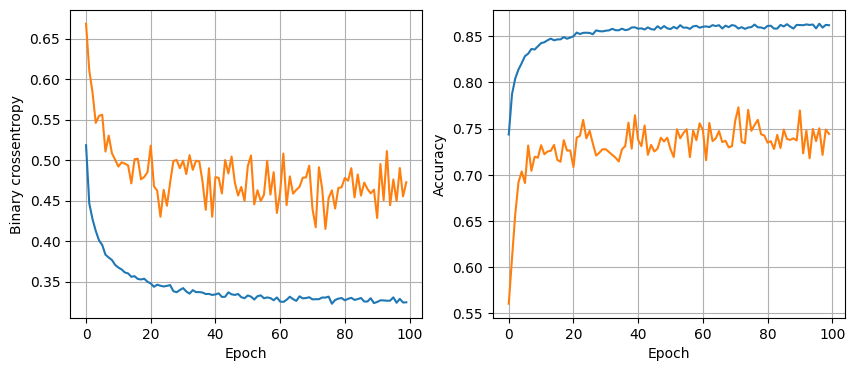

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8838 - loss: 0.2917
16 nodes, dropout 0.2, lr 0.001, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7089 - loss: 0.5886 - val_accuracy: 0.6392 - val_loss: 0.6276
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7856 - loss: 0.4539 - val_accuracy: 0.6301 - val_loss: 0.6452
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8054 - loss: 0.4272 - val_accuracy: 0.6487 - val_loss: 0.6150
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8074 - loss: 0.4235 - val_accuracy: 0.6443 - val_loss: 0.6253
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8166 - loss: 0.4114 - val_accuracy: 0.6765 - val_loss: 0.5845
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8275 - loss: 0.4010 - val_accuracy: 0.7121 - val_loss: 0.5537
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8298 - loss: 0.3930 - val_accuracy: 0

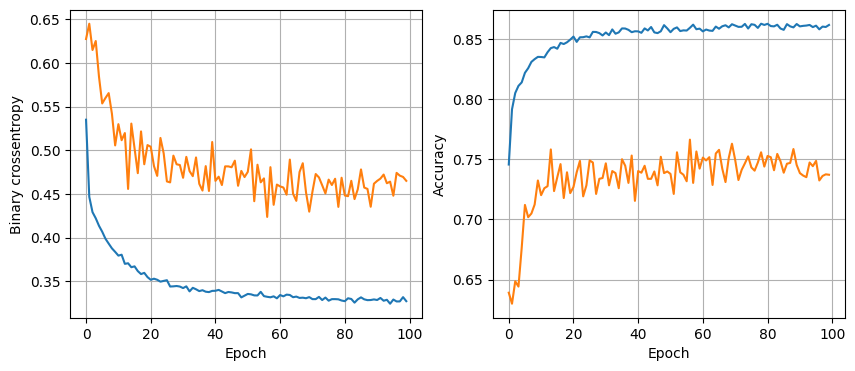

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8826 - loss: 0.2949
16 nodes, dropout 0.2, lr 0.001, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6485 - loss: 0.6343 - val_accuracy: 0.5830 - val_loss: 0.6786
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7625 - loss: 0.4927 - val_accuracy: 0.6277 - val_loss: 0.6522
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7890 - loss: 0.4553 - val_accuracy: 0.6216 - val_loss: 0.6616
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8005 - loss: 0.4420 - val_accuracy: 0.6457 - val_loss: 0.6258
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8040 - loss: 0.4308 - val_accuracy: 0.6728 - val_loss: 0.5795
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8131 - loss: 0.4146 - val_accuracy: 0.6690 - val_loss: 0.5875
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8157 - loss: 0.4148 - val_accuracy: 0.6728 - val_l

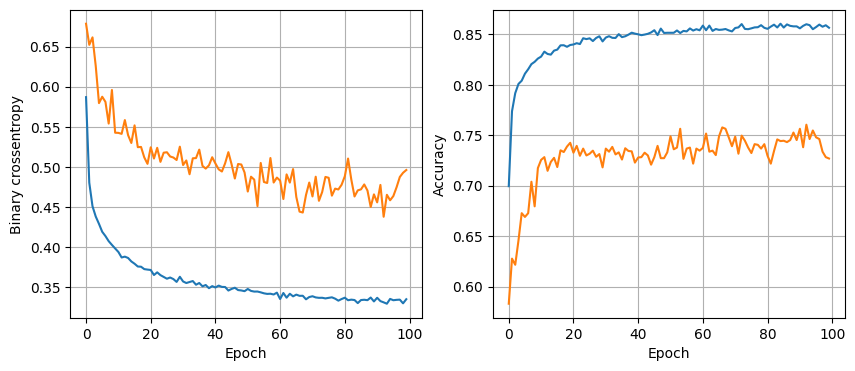

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8828 - loss: 0.2964
32 nodes, dropout 0, lr 0.01, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7946 - loss: 0.4325 - val_accuracy: 0.6999 - val_loss: 0.5146
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8525 - loss: 0.3435 - val_accuracy: 0.7243 - val_loss: 0.5157
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8534 - loss: 0.3385 - val_accuracy: 0.6789 - val_loss: 0.5348
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8581 - loss: 0.3311 - val_accuracy: 0.7818 - val_loss: 0.4292
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8612 - loss: 0.3293 - val_accuracy: 0.7625 - val_loss: 0.4895
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8647 - loss: 0.3143 - val_accuracy: 0.7503 - val_loss: 0.4582
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8677 - loss: 0.3121 - val_accuracy: 0.77

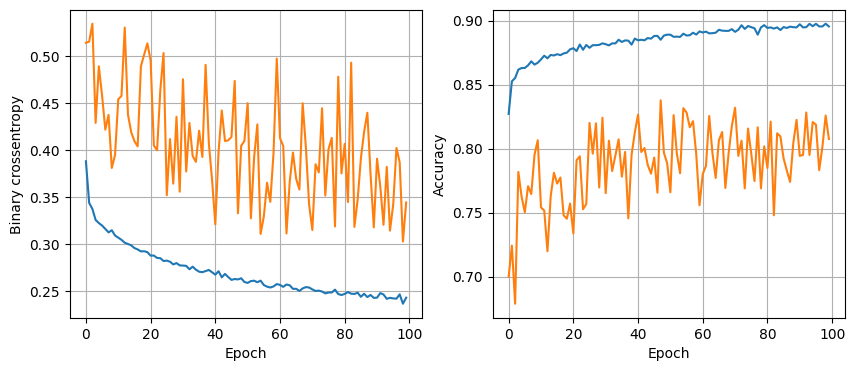

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8814 - loss: 0.3222
32 nodes, dropout 0, lr 0.01, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8128 - loss: 0.4269 - val_accuracy: 0.7439 - val_loss: 0.5088
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8528 - loss: 0.3392 - val_accuracy: 0.7632 - val_loss: 0.4800
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8628 - loss: 0.3335 - val_accuracy: 0.7439 - val_loss: 0.4710
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8648 - loss: 0.3246 - val_accuracy: 0.8106 - val_loss: 0.3789
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8604 - loss: 0.3169 - val_accuracy: 0.8049 - val_loss: 0.3759
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8620 - loss: 0.3147 - val_accuracy: 0.7663 - val_loss: 0.4583
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8687 - loss: 0.3085 - val_accuracy: 0.78

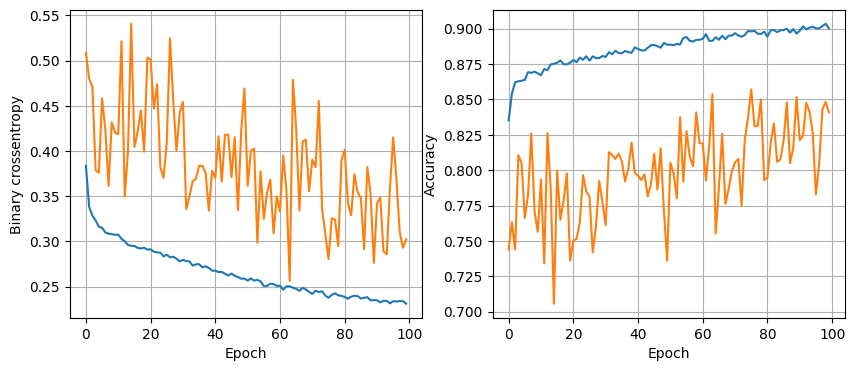

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8782 - loss: 0.3450
32 nodes, dropout 0, lr 0.01, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7711 - loss: 0.4674 - val_accuracy: 0.7320 - val_loss: 0.6054
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8549 - loss: 0.3440 - val_accuracy: 0.6883 - val_loss: 0.5500
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8492 - loss: 0.3445 - val_accuracy: 0.7229 - val_loss: 0.5187
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8572 - loss: 0.3290 - val_accuracy: 0.7730 - val_loss: 0.4220
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8606 - loss: 0.3207 - val_accuracy: 0.7890 - val_loss: 0.3899
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8627 - loss: 0.3204 - val_accuracy: 0.7673 - val_loss: 0.4673
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8670 - loss: 0.3174 - val_accuracy: 0.7273 - val_loss

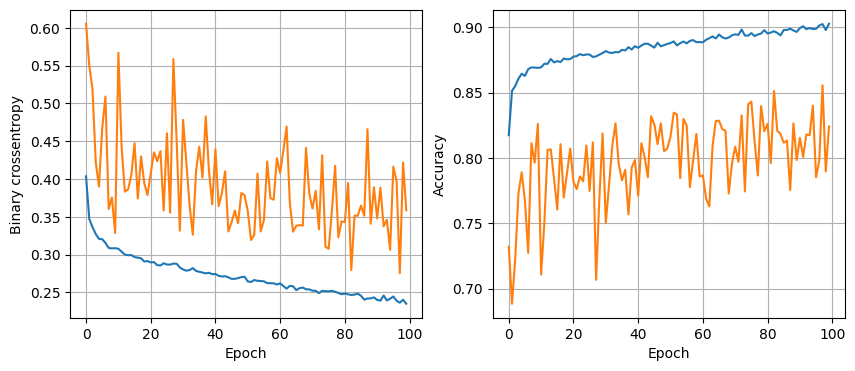

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8881 - loss: 0.3057
32 nodes, dropout 0, lr 0.005, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7903 - loss: 0.4432 - val_accuracy: 0.7558 - val_loss: 0.4985
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8532 - loss: 0.3423 - val_accuracy: 0.7263 - val_loss: 0.5387
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8557 - loss: 0.3385 - val_accuracy: 0.7747 - val_loss: 0.4389
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8619 - loss: 0.3233 - val_accuracy: 0.7846 - val_loss: 0.4325
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8634 - loss: 0.3188 - val_accuracy: 0.7575 - val_loss: 0.4906
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8670 - loss: 0.3149 - val_accuracy: 0.7568 - val_loss: 0.4316
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8743 - loss: 0.3056 - val_accuracy: 0.7

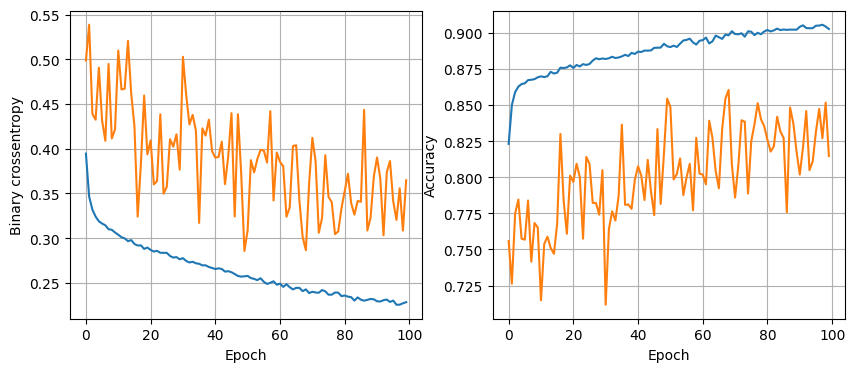

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8790 - loss: 0.3362
32 nodes, dropout 0, lr 0.005, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7787 - loss: 0.4577 - val_accuracy: 0.6714 - val_loss: 0.5929
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8528 - loss: 0.3414 - val_accuracy: 0.7395 - val_loss: 0.4967
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8626 - loss: 0.3352 - val_accuracy: 0.7341 - val_loss: 0.5188
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8676 - loss: 0.3183 - val_accuracy: 0.7598 - val_loss: 0.4615
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8644 - loss: 0.3158 - val_accuracy: 0.7524 - val_loss: 0.4454
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8696 - loss: 0.3129 - val_accuracy: 0.7713 - val_loss: 0.4327
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8685 - loss: 0.3019 - val_accuracy: 0.7

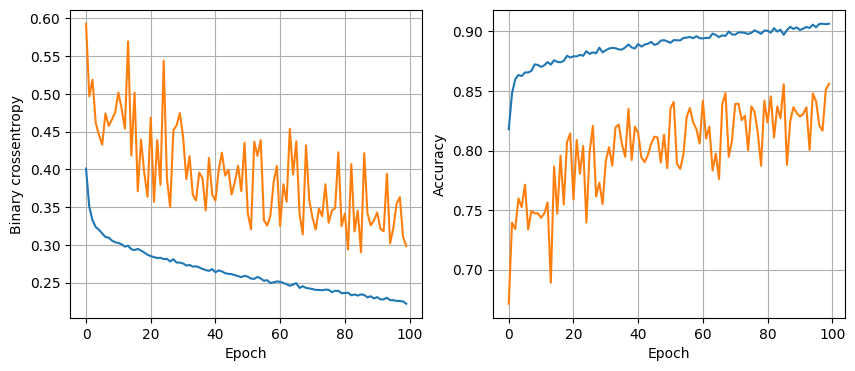

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8768 - loss: 0.3241
32 nodes, dropout 0, lr 0.005, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7523 - loss: 0.4973 - val_accuracy: 0.7917 - val_loss: 0.4231
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8396 - loss: 0.3661 - val_accuracy: 0.6992 - val_loss: 0.5759
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8626 - loss: 0.3324 - val_accuracy: 0.7327 - val_loss: 0.5217
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8618 - loss: 0.3278 - val_accuracy: 0.7571 - val_loss: 0.4612
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8637 - loss: 0.3204 - val_accuracy: 0.7900 - val_loss: 0.4113
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8631 - loss: 0.3256 - val_accuracy: 0.8106 - val_loss: 0.3968
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8667 - loss: 0.3234 - val_accuracy: 0.7432 - val_los

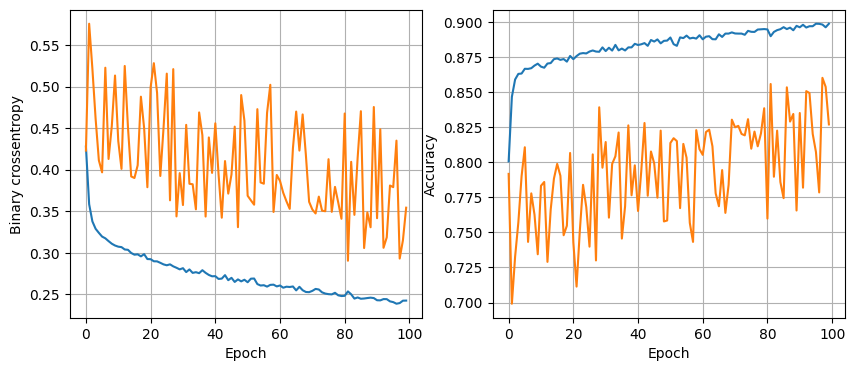

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8706 - loss: 0.3215
32 nodes, dropout 0, lr 0.001, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7418 - loss: 0.5301 - val_accuracy: 0.6182 - val_loss: 0.6348
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8310 - loss: 0.3864 - val_accuracy: 0.6453 - val_loss: 0.6674
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8430 - loss: 0.3695 - val_accuracy: 0.7205 - val_loss: 0.5483
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8494 - loss: 0.3522 - val_accuracy: 0.7568 - val_loss: 0.4815
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8608 - loss: 0.3325 - val_accuracy: 0.7497 - val_loss: 0.4952
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8541 - loss: 0.3456 - val_accuracy: 0.7422 - val_loss: 0.5062
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8664 - loss: 0.3232 - val_accuracy: 0.7

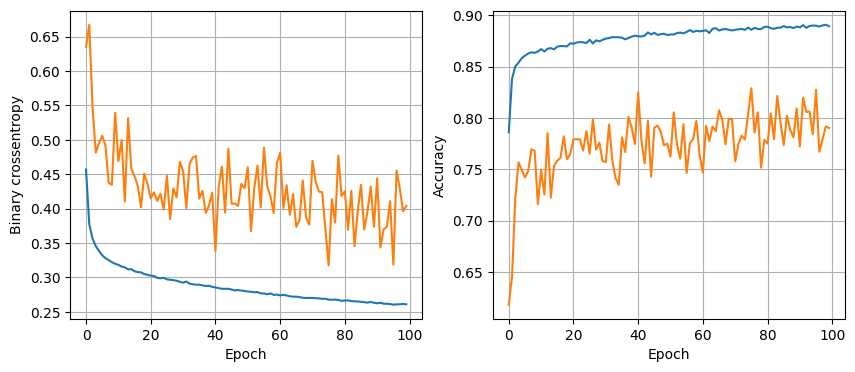

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8820 - loss: 0.2967
32 nodes, dropout 0, lr 0.001, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7145 - loss: 0.5686 - val_accuracy: 0.6220 - val_loss: 0.6506
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8312 - loss: 0.3873 - val_accuracy: 0.6687 - val_loss: 0.5879
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8426 - loss: 0.3677 - val_accuracy: 0.7158 - val_loss: 0.5484
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8562 - loss: 0.3436 - val_accuracy: 0.7100 - val_loss: 0.5554
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8547 - loss: 0.3448 - val_accuracy: 0.7087 - val_loss: 0.5696
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8575 - loss: 0.3325 - val_accuracy: 0.7300 - val_loss: 0.5057
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8593 - loss: 0.3390 - val_accuracy: 0.7

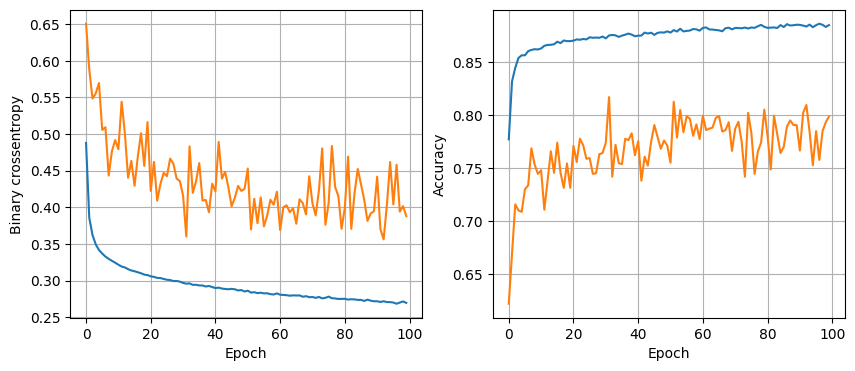

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8896 - loss: 0.2879
32 nodes, dropout 0, lr 0.001, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6586 - loss: 0.6068 - val_accuracy: 0.5996 - val_loss: 0.6575
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8106 - loss: 0.4098 - val_accuracy: 0.6606 - val_loss: 0.6044
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8262 - loss: 0.3890 - val_accuracy: 0.6917 - val_loss: 0.5656
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8474 - loss: 0.3615 - val_accuracy: 0.7188 - val_loss: 0.5306
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8544 - loss: 0.3512 - val_accuracy: 0.7507 - val_loss: 0.4807
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8563 - loss: 0.3432 - val_accuracy: 0.7368 - val_loss: 0.5056
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8539 - loss: 0.3452 - val_accuracy: 0.7378 - val_los

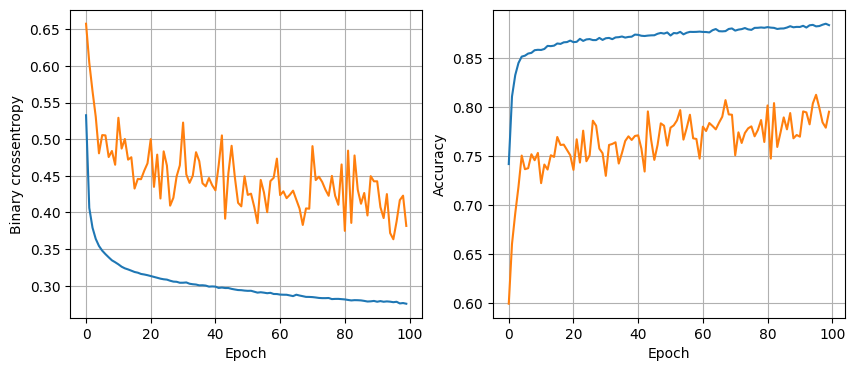

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8884 - loss: 0.2826
32 nodes, dropout 0.2, lr 0.01, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7855 - loss: 0.4603 - val_accuracy: 0.6995 - val_loss: 0.5362
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8414 - loss: 0.3693 - val_accuracy: 0.7503 - val_loss: 0.4606
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8477 - loss: 0.3625 - val_accuracy: 0.7439 - val_loss: 0.4445
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8503 - loss: 0.3526 - val_accuracy: 0.7578 - val_loss: 0.4448
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8549 - loss: 0.3445 - val_accuracy: 0.8032 - val_loss: 0.3809
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8489 - loss: 0.3480 - val_accuracy: 0.6829 - val_loss: 0.5709
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8550 - loss: 0.3362 - val_accuracy: 0.

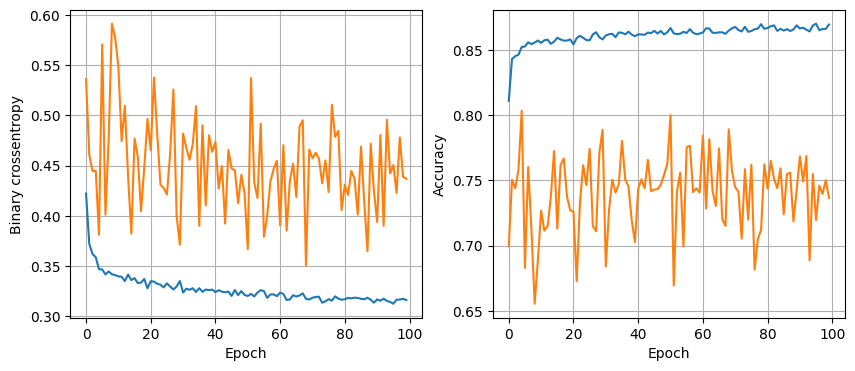

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8815 - loss: 0.2921
32 nodes, dropout 0.2, lr 0.01, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7715 - loss: 0.4762 - val_accuracy: 0.7351 - val_loss: 0.5236
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8383 - loss: 0.3702 - val_accuracy: 0.6717 - val_loss: 0.6161
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8446 - loss: 0.3687 - val_accuracy: 0.7287 - val_loss: 0.4475
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8513 - loss: 0.3498 - val_accuracy: 0.6839 - val_loss: 0.5384
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8556 - loss: 0.3480 - val_accuracy: 0.7097 - val_loss: 0.5151
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8539 - loss: 0.3415 - val_accuracy: 0.7676 - val_loss: 0.4560
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8600 - loss: 0.3316 - val_accuracy: 0.

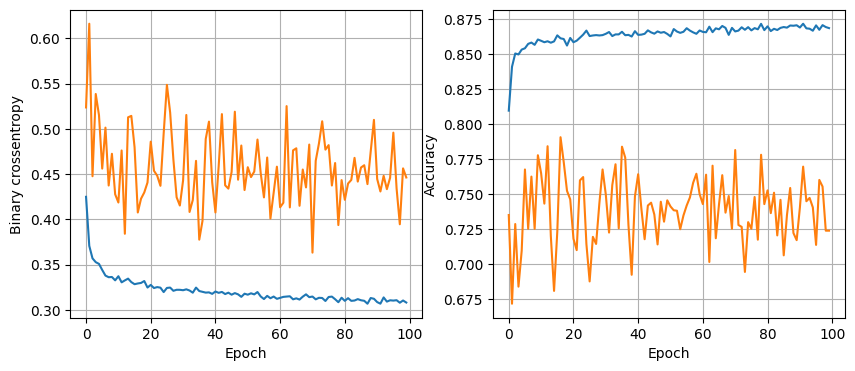

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8798 - loss: 0.2960
32 nodes, dropout 0.2, lr 0.01, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7342 - loss: 0.5249 - val_accuracy: 0.6860 - val_loss: 0.5754
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8254 - loss: 0.3967 - val_accuracy: 0.6280 - val_loss: 0.6049
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8414 - loss: 0.3688 - val_accuracy: 0.6541 - val_loss: 0.6197
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8529 - loss: 0.3454 - val_accuracy: 0.7429 - val_loss: 0.4653
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8550 - loss: 0.3370 - val_accuracy: 0.7236 - val_loss: 0.4833
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8531 - loss: 0.3403 - val_accuracy: 0.7202 - val_loss: 0.5477
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8506 - loss: 0.3371 - val_accuracy: 0.6822 - val_lo

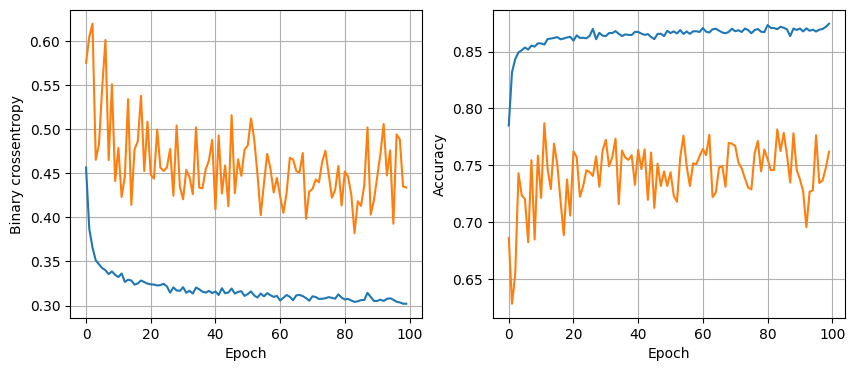

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8885 - loss: 0.2820
32 nodes, dropout 0.2, lr 0.005, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7742 - loss: 0.4750 - val_accuracy: 0.7131 - val_loss: 0.4997
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8377 - loss: 0.3880 - val_accuracy: 0.8049 - val_loss: 0.4047
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8523 - loss: 0.3483 - val_accuracy: 0.6914 - val_loss: 0.5745
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8520 - loss: 0.3428 - val_accuracy: 0.6924 - val_loss: 0.5867
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8525 - loss: 0.3424 - val_accuracy: 0.7222 - val_loss: 0.5403
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8596 - loss: 0.3301 - val_accuracy: 0.7114 - val_loss: 0.5184
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8510 - loss: 0.3502 - val_accuracy: 0

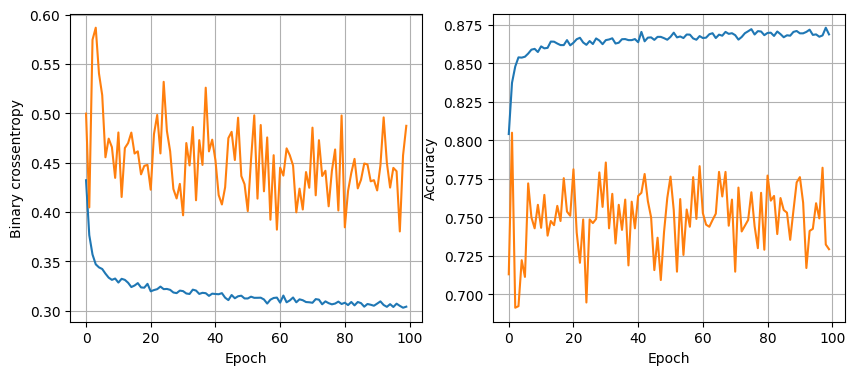

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8875 - loss: 0.2780
32 nodes, dropout 0.2, lr 0.005, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7715 - loss: 0.4883 - val_accuracy: 0.7232 - val_loss: 0.5669
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8281 - loss: 0.3949 - val_accuracy: 0.7703 - val_loss: 0.4428
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8414 - loss: 0.3754 - val_accuracy: 0.7053 - val_loss: 0.5136
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8501 - loss: 0.3558 - val_accuracy: 0.7039 - val_loss: 0.5355
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8528 - loss: 0.3448 - val_accuracy: 0.7673 - val_loss: 0.4288
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8513 - loss: 0.3478 - val_accuracy: 0.7425 - val_loss: 0.4847
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8509 - loss: 0.3486 - val_accuracy: 0

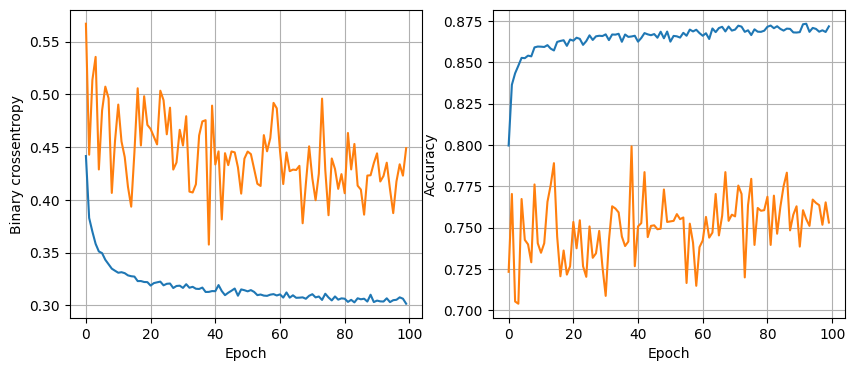

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8850 - loss: 0.2848
32 nodes, dropout 0.2, lr 0.005, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7393 - loss: 0.5314 - val_accuracy: 0.6938 - val_loss: 0.5772
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8328 - loss: 0.3994 - val_accuracy: 0.7524 - val_loss: 0.4976
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8375 - loss: 0.3778 - val_accuracy: 0.7290 - val_loss: 0.5295
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8411 - loss: 0.3644 - val_accuracy: 0.7486 - val_loss: 0.4808
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8506 - loss: 0.3542 - val_accuracy: 0.7988 - val_loss: 0.4164
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8490 - loss: 0.3599 - val_accuracy: 0.7730 - val_loss: 0.4473
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8502 - loss: 0.3454 - val_accuracy: 0.7334 - val_l

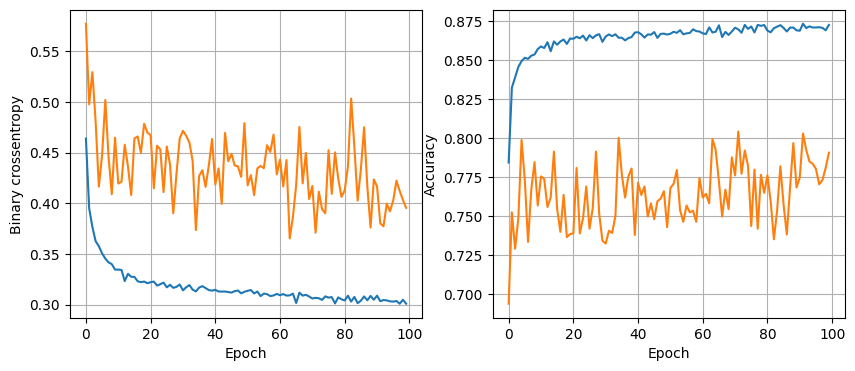

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8812 - loss: 0.2828
32 nodes, dropout 0.2, lr 0.001, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6967 - loss: 0.5874 - val_accuracy: 0.6524 - val_loss: 0.5863
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8107 - loss: 0.4211 - val_accuracy: 0.6555 - val_loss: 0.6301
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8249 - loss: 0.4036 - val_accuracy: 0.7043 - val_loss: 0.5714
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8311 - loss: 0.3913 - val_accuracy: 0.7314 - val_loss: 0.5294
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8401 - loss: 0.3842 - val_accuracy: 0.7151 - val_loss: 0.5448
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8400 - loss: 0.3706 - val_accuracy: 0.7419 - val_loss: 0.5075
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8471 - loss: 0.3701 - val_accuracy: 0

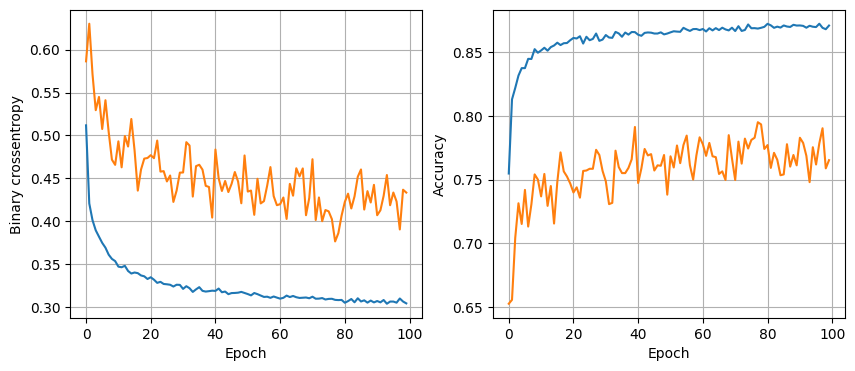

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8858 - loss: 0.2826
32 nodes, dropout 0.2, lr 0.001, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6969 - loss: 0.5870 - val_accuracy: 0.6192 - val_loss: 0.6364
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8083 - loss: 0.4270 - val_accuracy: 0.6341 - val_loss: 0.6124
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8184 - loss: 0.4111 - val_accuracy: 0.6988 - val_loss: 0.5438
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8272 - loss: 0.3963 - val_accuracy: 0.7033 - val_loss: 0.5336
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8237 - loss: 0.3951 - val_accuracy: 0.7171 - val_loss: 0.5403
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8405 - loss: 0.3745 - val_accuracy: 0.7327 - val_loss: 0.5166
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8400 - loss: 0.3826 - val_accuracy: 0

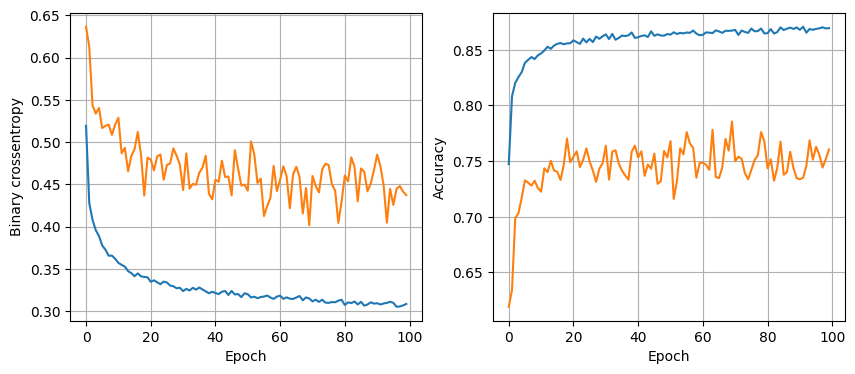

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8827 - loss: 0.2825
32 nodes, dropout 0.2, lr 0.001, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5547 - loss: 0.6850 - val_accuracy: 0.5078 - val_loss: 0.7098
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7745 - loss: 0.4911 - val_accuracy: 0.5962 - val_loss: 0.6404
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7946 - loss: 0.4427 - val_accuracy: 0.6386 - val_loss: 0.6144
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8021 - loss: 0.4263 - val_accuracy: 0.6406 - val_loss: 0.6236
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8128 - loss: 0.4103 - val_accuracy: 0.6812 - val_loss: 0.5715
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8296 - loss: 0.3925 - val_accuracy: 0.6853 - val_loss: 0.5824
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8286 - loss: 0.3979 - val_accuracy: 0.6853 - val_l

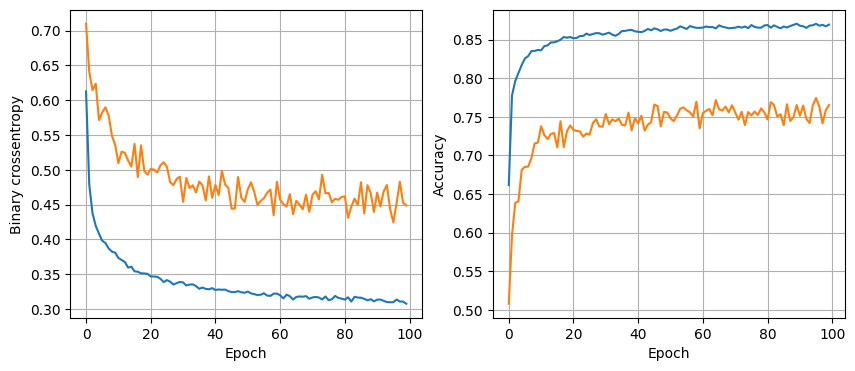

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8806 - loss: 0.2827
64 nodes, dropout 0, lr 0.01, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8091 - loss: 0.4233 - val_accuracy: 0.7425 - val_loss: 0.5215
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8522 - loss: 0.3454 - val_accuracy: 0.7686 - val_loss: 0.4401
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8573 - loss: 0.3341 - val_accuracy: 0.7791 - val_loss: 0.4115
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8613 - loss: 0.3287 - val_accuracy: 0.6762 - val_loss: 0.6603
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8652 - loss: 0.3180 - val_accuracy: 0.7348 - val_loss: 0.4958
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8695 - loss: 0.3106 - val_accuracy: 0.7253 - val_loss: 0.4863
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8690 - loss: 0.3120 - val_accuracy: 0.78

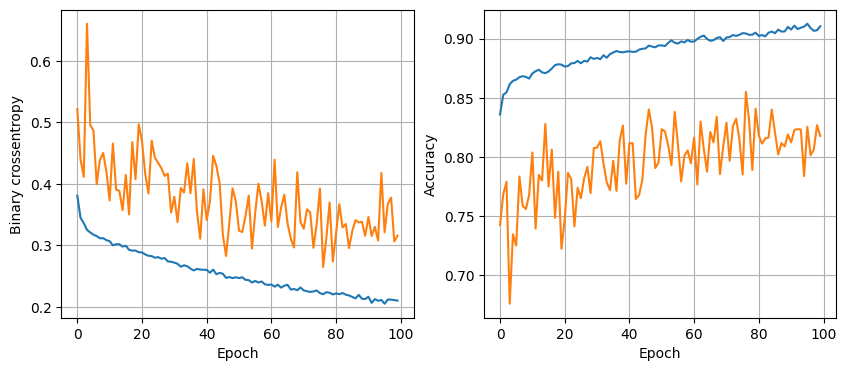

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8680 - loss: 0.4338
64 nodes, dropout 0, lr 0.01, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8075 - loss: 0.4235 - val_accuracy: 0.7754 - val_loss: 0.4288
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8475 - loss: 0.3519 - val_accuracy: 0.7215 - val_loss: 0.5332
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8578 - loss: 0.3335 - val_accuracy: 0.7290 - val_loss: 0.5094
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8601 - loss: 0.3286 - val_accuracy: 0.7625 - val_loss: 0.4574
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8634 - loss: 0.3161 - val_accuracy: 0.7646 - val_loss: 0.4217
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8644 - loss: 0.3169 - val_accuracy: 0.7527 - val_loss: 0.4995
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8677 - loss: 0.3153 - val_accuracy: 0.69

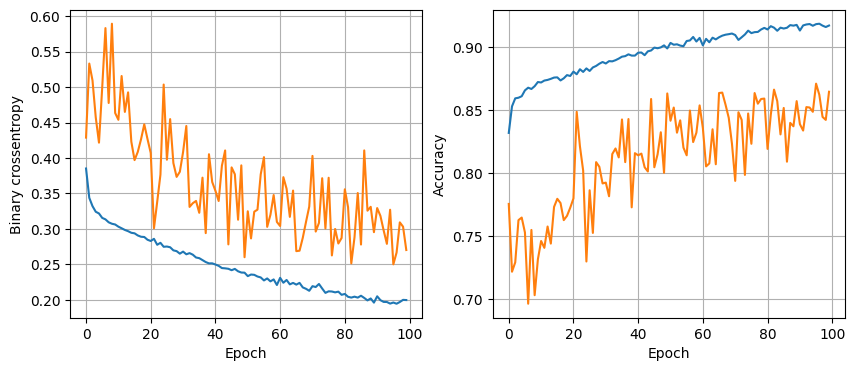

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8785 - loss: 0.4070
64 nodes, dropout 0, lr 0.01, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7777 - loss: 0.4590 - val_accuracy: 0.8198 - val_loss: 0.3600
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8392 - loss: 0.3668 - val_accuracy: 0.6826 - val_loss: 0.6181
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8570 - loss: 0.3321 - val_accuracy: 0.7805 - val_loss: 0.4321
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8595 - loss: 0.3289 - val_accuracy: 0.7907 - val_loss: 0.4238
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8649 - loss: 0.3196 - val_accuracy: 0.7486 - val_loss: 0.4683
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8649 - loss: 0.3165 - val_accuracy: 0.7995 - val_loss: 0.3815
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8678 - loss: 0.3156 - val_accuracy: 0.7124 - val_loss

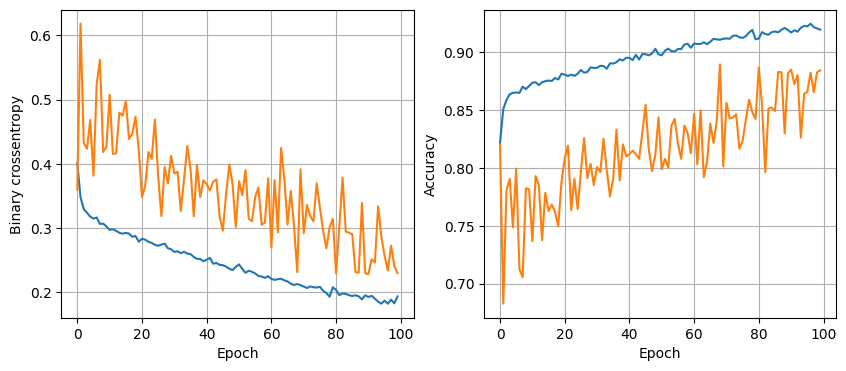

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8672 - loss: 0.4043
64 nodes, dropout 0, lr 0.005, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8004 - loss: 0.4329 - val_accuracy: 0.6714 - val_loss: 0.6095
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8494 - loss: 0.3497 - val_accuracy: 0.7202 - val_loss: 0.5341
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8588 - loss: 0.3347 - val_accuracy: 0.7195 - val_loss: 0.5396
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8652 - loss: 0.3240 - val_accuracy: 0.7585 - val_loss: 0.4620
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8643 - loss: 0.3219 - val_accuracy: 0.6768 - val_loss: 0.5920
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8680 - loss: 0.3101 - val_accuracy: 0.7422 - val_loss: 0.4507
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8663 - loss: 0.3181 - val_accuracy: 0.7

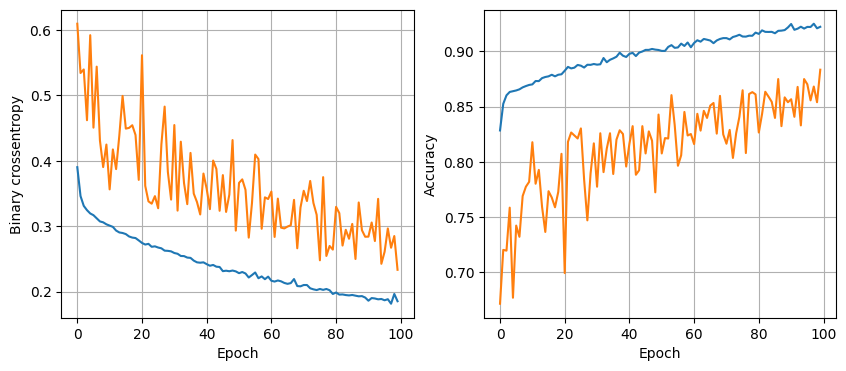

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8716 - loss: 0.4196
64 nodes, dropout 0, lr 0.005, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7813 - loss: 0.4564 - val_accuracy: 0.6877 - val_loss: 0.5896
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8537 - loss: 0.3452 - val_accuracy: 0.7378 - val_loss: 0.5121
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8566 - loss: 0.3381 - val_accuracy: 0.7463 - val_loss: 0.4883
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8575 - loss: 0.3286 - val_accuracy: 0.7710 - val_loss: 0.4566
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8638 - loss: 0.3153 - val_accuracy: 0.7761 - val_loss: 0.4031
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8671 - loss: 0.3179 - val_accuracy: 0.7995 - val_loss: 0.3604
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8704 - loss: 0.3108 - val_accuracy: 0.7

In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]: #farkli parametrelerle farkli kombinasyonlar uretiyoruz
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss: #least_val_loss loss u en dusuk olan kombinasyon cesidini tutuyor
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,) #0.5 den buyukse true donuyor true yu integera cevirip 1 yapiyoruz

In [ ]:
print(classification_report(y_test, y_pred))